<h1 align="center"> Systematic Mapping Analysis </h1>

In [2]:
import xlrd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter

artigos_finais = '/home/bravo/Documentos/Systematic_Mapping/Final_list_of_articles.xlsx'

index = list(range(1, 62)) # lista de interos de 1 até 61

columns = [
            'titulo', 
            'ano', 
            'autores', 
            'pais', 
            'meioPub', # meio de publicação
            'localPub', # local de publicação
            'editora', 
            'par_extr_aluno',   # parâmetros os critérios de fitness extrínsecos do aluno
            'par_intr_aluno',   # parâmetros os critérios de fitness intrínsecos do aluno
            'par_material',     # parâmetros os critérios de fitness do material didático
            'padrao_material',  # padrão utilizado pelo material didático
            'exp_bd_sint',      # experimento utiliza base de dados sintética
            'exp_bd_sint_disp', # experimento disponibiliza a base de dados sintética
            'exp_bd_real',      # experimento utiliza base de dados real
            'exp_bd_real_disp', # experimento disponibiliza base de dados real
            'abordagem', # abordagem evolutiva utilizada
            'tipoSeq',   # tipo de sequenciamento
            'seq_tem_tarefas', # o sequenciamento considera tarefas?
            'estrut_pedag', # estrutura pedagógica utilizada
            'outrasTec' # outras tecnologias utilizadas
            ]

columns_ignore = [13, 14, 17, 18, 20, 25, 26] # colunas ignoradas

def readTable(file, colmns_ignore):
    arquivo = xlrd.open_workbook(file)
    tab = arquivo.sheet_by_index(0) # usar a primeira tabela do arquivo

    data = list()
 
    for row in range(1, tab.nrows):
        linha = list()
        for col in range (0, tab.ncols):
            if col not in columns_ignore:
                linha.append(tab.cell_value(row, col))  
        data.append(linha)
        
    return data

data = readTable(artigos_finais, columns_ignore)
tab = pd.DataFrame(data, index, columns)

tab = tab.astype({'ano': int}) # convertendo a coluna ano para int

print("Dados Carregados!")

#print(tab[0:3])

Dados Carregados!


In [43]:
def generateBarChart(lista, xticks, x_label, y_label, title, filtrate, downloadImage = False):        
    lista_counts = Counter(lista)
    if filtrate:
        lista_counts = dict((k, v) for k, v in lista_counts.items() if v > 1) 
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.bar(lista_counts.keys(), lista_counts.values())
    if xticks:
        plt.xticks(rotation=90) 
        #plt.xticks(np.arange(2005, 2019, 1), rotation=45) # gráfico anoXtempo
    if downloadImage:
        plt.savefig(title+'.png')
    plt.show

    
def organize(list, c):
    result = []
    for i in list:
        if c in i:
            s = i.split( c + ' ')
            result.extend(s)
        else:
            result.append(i)
    return result

def generateTable(lista, orient, columns, sort=False, filtered=False, saveCSV=False):
    lista_count = Counter(lista)
    if filtered:
        lista_count = dict((k, v) for k, v in lista_count.items() if v > 1)
    df = pd.DataFrame.from_dict(lista_count, orient=orient, columns=[columns])
    if sort:
        df = df.sort_values(by=[columns], ascending=False)
    df.reset_index(level=0, inplace=True)
    if saveCSV:
        df.to_csv('exportCSV.csv', index=False)
    display(df)

### MQ1: How many studies were published over the years?


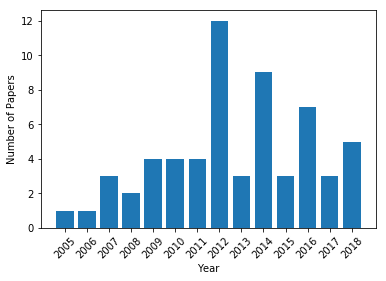

In [4]:
# MQ1: How many studies were published over the years?

ano = tab.loc[:]['ano']    
generateBarChart(ano, True, 'Year', 'Number of Papers', '', False, True)

### MQ2: Who are the most active authors in the area?

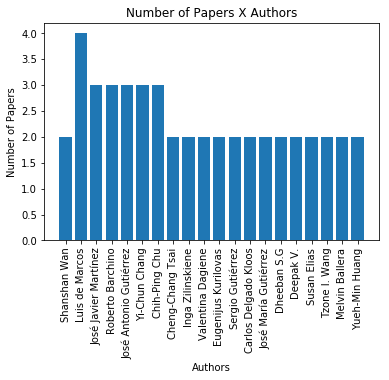

In [8]:
# autores mais ativos

autores = tab.loc[:]['autores']
authors = organize(autores, ',')
generateBarChart(authors, True, 'Authors', 'Number of Papers', 'Number of Papers X Authors', True)



In [6]:
authors = organize(autores, ',')

generateTable(authors, 'index', 'Total', True, True)

,index,Total
0,Luis de Marcos,4
1,José Javier Martínez,3
2,Roberto Barchino,3
3,José Antonio Gutiérrez,3
4,Yi-Chun Chang,3
5,Chih-Ping Chu,3
6,Shanshan Wan,2
7,José María Gutiérrez,2
8,Melvin Ballera,2
9,Tzone I. Wang,2


### MQ3: Which countries have the most active authors in the area?

,index,Total
0,Spain,5
1,Taiwan,4
2,Lithuania,3
3,China,1


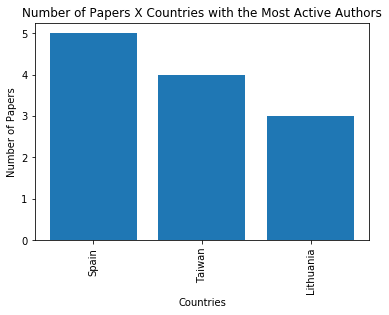

In [9]:
# Quais países tem os autores mais ativos?

pais = tab.loc[:]["pais"]

autoresPaises = list()
for a, p in zip(autores, pais):
    r = []
    if ',' in a:
        s = a.split(', ')
        autoresPaises.extend([name + '/' + p for name in s]) # concatenando o nome de cada autor com o seu país associado    

autoresPaises_counts = Counter(autoresPaises)
autoresPaises_filtered = dict((k, v) for k, v in autoresPaises_counts.items() if v > 1) # filtragem de autores, mostrar apenas aqueles que publicaram mais de 1 vez
paises = [ap.split('/')[1] for ap in autoresPaises_filtered.keys()]      
        
generateBarChart(paises, True, 'Countries', 'Number of Papers', 'Number of Papers X Countries with the Most Active Authors', True)

generateTable(paises, 'index', 'Total', True)

### MQ4:  Which  publication  vehicles  are  the  main  targets  for research production in the area?

,index,Total
0,journal,34
1,proceedings,24
2,book,2
3,jounrnal,1


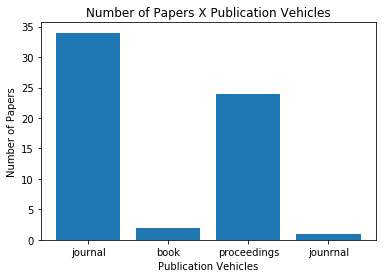

In [10]:
# quantidade de artigos por meio de publicação

meioPub = tab.loc[:]['meioPub']
generateBarChart(meioPub, False, 'Publication Vehicles', 'Number of Papers', 'Number of Papers X Publication Vehicles', False)

generateTable(meioPub, 'index', 'Total', True)

In [46]:
# Dentro dos jornals quais são os que tem mais publicações?

localPub = tab.loc[:]['localPub']
journals = list()
for i, meioP in enumerate(meioPub):
    if(meioP == 'journal'):
        journals.append(localPub.values[i])

generateTable(journals, 'index', 'Total', True, True)

,index,Total
0,Expert Systems with Applications,6
1,International Journal of Engineering Education,2
2,Journal of Educational Technology & Society,2
3,Education and Information Technologies,2


In [47]:
# Dentro das conferências quais são as que tem mais publicações?

localPub = tab.loc[:]['localPub']
proceedings = list()
for i, meioP in enumerate(meioPub):
    if(meioP == 'proceedings'):
        proceedings.append(localPub.values[i])

generateTable(proceedings, 'index', 'Total', True, True)

,index,Total
0,International Conference on Multimedia Computi...,2
1,International Conference on E-Learning and E-T...,2


### MQ5:  What  are  the  most  commonly  used  evolutionary computing approaches?

,index,Total
0,Ant Colony Optimization,23
1,Genetic Algorithm,22
2,Particle Swarm Optimization,8
3,Immune Algorithm,1
4,Population Based Incremental Learning,1
5,Harmony Search Algorithm,1
6,Parliamentary Optimization Algorithm,1
7,Shuffled Frog Leaping Algorithm,1
8,Reversed roulette wheel selection algorithm,1
9,DNA,1


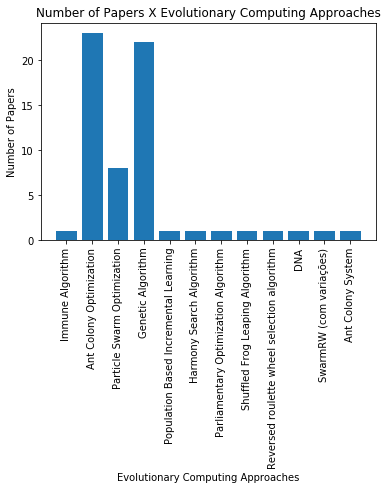

In [13]:
# quantidade de artigos por abordagem evolutiva

abordagem = tab.loc[:]['abordagem']

abordagemAgr = list()

for i, abord in enumerate(abordagem): # agrupamento das variações das seguintes abordagens:
    if 'Genetic Algorithm' in abord:
        abordagemAgr.append('Genetic Algorithm')
    elif 'Particle Swarm Optimization' in abord:
        abordagemAgr.append('Particle Swarm Optimization')
    else:
        abordagemAgr.append(abord)
        
abordEvol = organize(abordagemAgr, ';')
generateBarChart(abordEvol, True, 'Evolutionary Computing Approaches', 'Number of Papers', 'Number of Papers X Evolutionary Computing Approaches', False)

abordEvol_count = Counter(abordEvol)

generateTable(abordEvol_count, 'index', 'Total', True)

### MQ6: What are the most commonly used student parameters to address adaptive curriculum sequencing?

In [15]:
paramIntrinsecos = {
    1:'Learning Style',
    2:'Learning Style',
    3:'Cognitive Level',
    4:'Psychological Factors',
    5:'Competence',
    6:'Learning Style',
    7:'Cognitive Level',
    8:'Learning Style',
    9:'Cerebral Hemispheres',
    10:'Learning Style',
    11:'Learning Style',
    12:'Learning Speed',
    13:'Preferences',
    15:'Learning Style',
    18:'Psychological Profile'
}

paramExtrinsecos = {
    'TD':'Time', 
    'T':'Time',
    'Tij': 'Time',
    'CE':'Measure of Knowledge',
    'K':'Measure of Knowledge',
    'KH':'Measure of Knowledge',
    'HP':'Measure of Knowledge',
    'HE':'Measure of Knowledge',
    'PMD':'Measure of Knowledge',
    'RW':'Measure of Knowledge',
    'CA':'Measure of Knowledge',
    'PL':'Measure of Knowledge',
    'B':'Behavior',
    'L':'Gographic Location',
    'CQ':'Connection Quality'
}

,index,Total
0,-,27
1,Learning Style,19
2,Competence,7
3,Preferences,7
4,Cognitive Level,5
5,Psychological Factors,1
6,Psychological Profile,1
7,Learning Speed,1
8,None,1
9,Cerebral Hemispheres,1


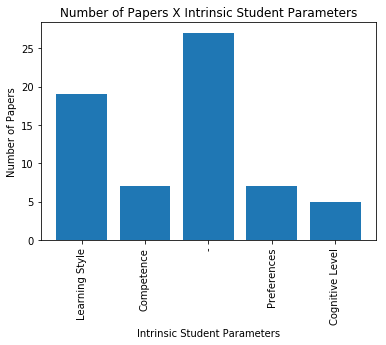

In [16]:
# Quais são os parâmetros intrínsecos do aluno mais usados?

par_intr_aluno = tab.loc[:]['par_intr_aluno']
par_intr_aluno = list(str(x) for x in par_intr_aluno)

parInA = list(filter(lambda i: i!= 'não' and i!= 'n/a', par_intr_aluno)) # retorna a lista de parâmetros sem 'não e 'n/a

parInA = organize(parInA, ',')


for index, par in enumerate(parInA):
    if par != '-':
        parInA[index] = paramIntrinsecos.get(int(float(par)))
                

generateBarChart(parInA, True, 'Intrinsic Student Parameters', 'Number of Papers', 'Number of Papers X Intrinsic Student Parameters', True)

generateTable(parInA, 'index', 'Total', True)

,index,Total
0,Measure of Knowledge,53
1,-,16
2,Time,15
3,S,7
4,LT,1
5,Behavior,1
6,Connection Quality,1
7,P,1
8,Gographic Location,1


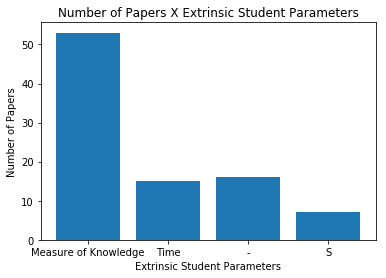

In [17]:
# Quais são os parâmetros extrínsecos do aluno mais usados?

par_extr_aluno = tab.loc[:]['par_extr_aluno']
parExA = list(filter(lambda i: i!= 'não' and i!= 'n/a', par_extr_aluno)) # retorna a lista de parâmetros sem 'não e 'n/a'
parExA = organize(parExA, ',')

for index, par in enumerate(parExA):
    if par != '-':
        if par in paramExtrinsecos.keys(): # tratar os casos de parâmetros excluídos: P, S e LT
            parExA[index] = paramExtrinsecos.get(par)

generateBarChart(parExA, False, 'Extrinsic Student Parameters', 'Number of Papers', 'Number of Papers X Extrinsic Student Parameters', True)

generateTable(parExA, 'index', 'Total', True)

### MQ7: What are the most commonly used learning material parameters to address adaptive curriculum sequencing?

In [18]:
paramMateriais = {
    'D': 'Difficulty',
    'DG': 'Difficulty',
    'FB': 'Difficulty',
    'TA': 'Time',
    'F': 'Media',
    'T': 'Type',
    'C': 'Explicit Concept',
    'R': 'Explicit Concept',
    'P': 'Implicit Concept',
    'G': 'Implicit Concept',
    'RH': 'Implicit Concept',
    'Rij': 'Implicit Concept',
    'RS': 'Implicit Concept',
    'DP': 'Implicit Concept',
    'InL': 'Level of Interaction',
    'InT': 'Type of Interactivity',
    'SD': 'Semantic Density',
    'LS': 'Learning Style-VARK',
    'FS': 'Learning Style-FSLSM',
    'CL': 'Availability',
    'NL': 'Availability',
    'MR': 'Availability',
    'CP': 'Competence',
}

,index,Total
0,Difficulty,36
1,Implicit Concept,18
2,Time,15
3,Explicit Concept,13
4,-,12
5,Type,10
6,Media,8
7,Competence,4
8,Availability,3
9,Learning Style-FSLSM,1


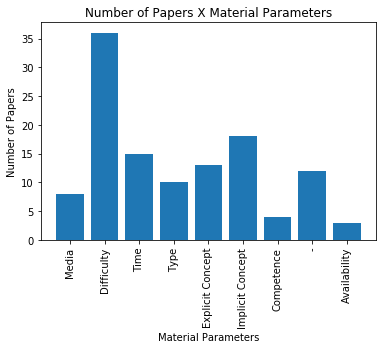

In [19]:
# Quais são os parâmetros dos materiais mais usados?

par_material = tab.loc[:]['par_material']
parMat = list(filter(lambda i: i!= 'não' and i!= 'n/a', par_material)) # retorna a lista de parâmetros sem 'não e 'n/a
parMat = organize(parMat, ',')

for index, par in enumerate(parMat):
    if par != '-':
        parMat[index] = paramMateriais.get(par)

generateBarChart(parMat, True, 'Material Parameters', 'Number of Papers', 'Number of Papers X Material Parameters', True)

generateTable(parMat, 'index', 'Total', True)

<h2 align="center"> Other Analyzes </h2>

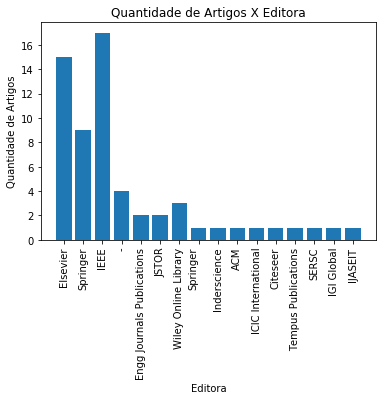

In [20]:
# quantidade de artigo por Editora

editora = tab.loc[:]["editora"]
generateBarChart(editora, True, "Editora", "Quantidade de Artigos", "Quantidade de Artigos X Editora", False)

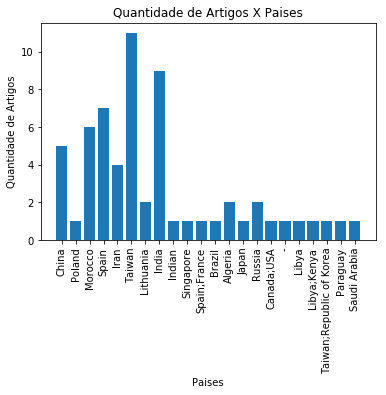

In [21]:
# quantidade de artigos por País

pais = tab.loc[:]['pais']
paises = organize(pais, ';')
generateBarChart(paises, True, 'Paises', 'Quantidade de Artigos', 'Quantidade de Artigos X Paises', False)

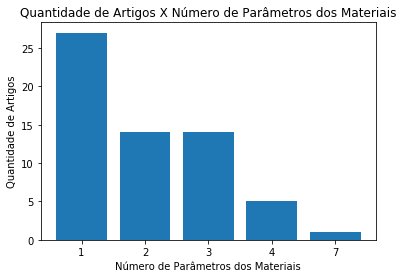

In [22]:
# Quantos parâmetros dos materiais são utilizados por artigo?

def contPar(lista):
    result = []
    for i  in lista:
        if i == 'não':
            result.append('0')
        elif i == 'n/a':
            result.append(i)
        else:
            result.append(str(len(i.split(', '))))
    return sorted(result)

par_material = tab.loc[:]['par_material']
contParMat = contPar(par_material)

generateBarChart(contParMat, False, 'Número de Parâmetros dos Materiais', 'Quantidade de Artigos', 'Quantidade de Artigos X Número de Parâmetros dos Materiais', False)

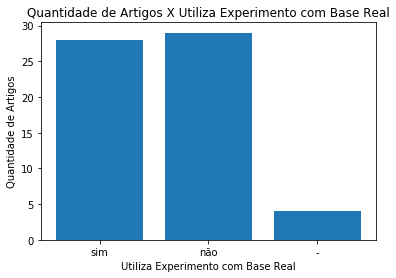

In [23]:
# Utilizam algum tipo de validação?

exp_bd_real = tab.loc[:]['exp_bd_real']

generateBarChart(exp_bd_real, False, 'Utiliza Experimento com Base Real', 'Quantidade de Artigos', 'Quantidade de Artigos X Utiliza Experimento com Base Real', False)

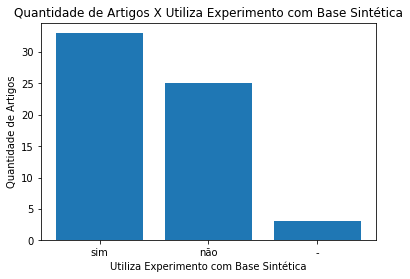

In [24]:
exp_bd_sint = tab.loc[:]['exp_bd_sint']

generateBarChart(exp_bd_sint, False, 'Utiliza Experimento com Base Sintética', 'Quantidade de Artigos', 'Quantidade de Artigos X Utiliza Experimento com Base Sintética', False)

Text(0.5, 0.98, 'Quantidade de Artigos X Tipo de Sequenciamento')

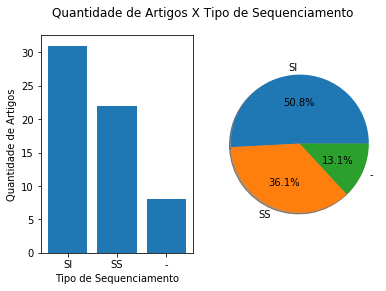

In [25]:
# quantidade de artigo por Tipo de Sequenciamento

tipoSeq = tab.loc[:]["tipoSeq"]
tipoSeq_counts = Counter(tipoSeq)
labels = tipoSeq_counts.keys()
sizes = tipoSeq_counts.values()

fig, axs = plt.subplots(1, 2)

axs[1].pie(list(sizes), labels=list(labels), autopct='%1.1f%%', shadow=True)
axs[1].axis('equal')

axs[0].set_ylabel("Quantidade de Artigos")
axs[0].set_xlabel("Tipo de Sequenciamento")
axs[0].bar(labels, sizes)

fig.suptitle("Quantidade de Artigos X Tipo de Sequenciamento")
#plt.show

In [ ]:
from itertools import combinations
from graphviz import Graph

dot = Graph(engine='circo', format='gv')

authors_counts = Counter(authors)
authors_nodes = list(authors_counts.keys()) #lista de autores

dot.attr('node', shape='point')

for node in authors_nodes:
    dot.node(node, node) # adicionando nó e rótulo

#edgesFile = 'CollaborationGraph_edges.txt'

#f = open(edgesFile, 'w+')
edges = list()
for i in autores: # lista de autores por publicação
    s = i.split(', ')
    comb = combinations(s, 2)
    for j in list(comb):
        #f.write(j[0]+';'+j[1]+'\n')
        dot.edge(j[0], j[1]) 
        edges.append(j)        
#f.close()

dot.render(view=True)